In [1]:
import sys
import torch
import numpy as np
import pickle as pkl

sys.path.append('../../../')

from models.supervised.mlp.model import MLP

from experiments.supervised.holonomy.script import main


In [2]:
np.random.seed(2)
torch.manual_seed(2)

In [3]:
mode = "moon"
model_name = "mlp"
size = "vanilla"
models_path = f"../../../models/supervised/{model_name}/saved_models"
if size == "overfit":
	with open(f'{models_path}/2_wide/{mode}/dataset.pkl', 'rb') as f:
		dataset = pkl.load(f)
else:
	with open(f'{models_path}/{size}/{mode}/dataset.pkl', 'rb') as f:
		dataset = pkl.load(f)


In [4]:
model = MLP(2,7,10,2)
epoch = 199
model.eval()
model.load_state_dict(torch.load(f'{models_path}/{size}/{mode}/model_{epoch}.pth'))

<All keys matched successfully>

Jacobian computed in 0.18758392333984375 seconds
Jacobian converted to numpy in 0.0006098747253417969 seconds
Pullback metric computed in 0.001149892807006836 seconds
Pullback differential computed in 0.0030210018157958984 seconds
Pullback Ricci computed in 0.001108407974243164 seconds
K=2 -> 774
Nodes remaining: {1519, 7}
K=3 -> 25
Nodes remaining: {80, 1808, 1376}
K=4 -> 1


KeyboardInterrupt: 

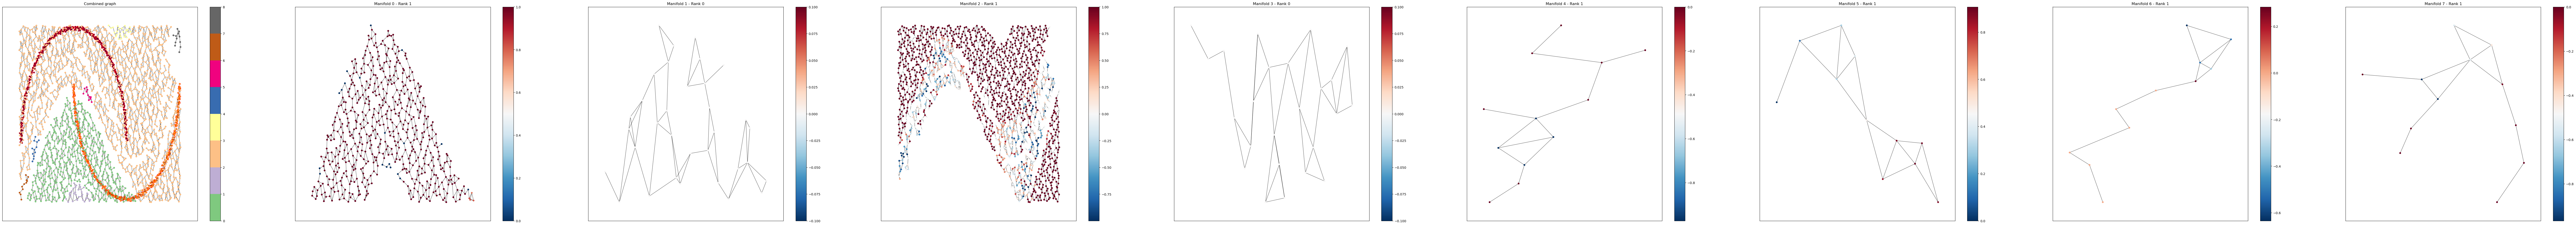

In [6]:
wrt = "output_wise"
sigma = 0.1
N = 50
subgraphs = main(model, dataset, quantile=0.85, tol=1e-5, max_K=int(np.sqrt(len(dataset.X))), save_path=f"figures/{mode}/{model_name}/{size}/{epoch}/", wrt=wrt, N=N, sigma=sigma, MIN_SIZE=None, plot_V=True)
